In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# this dataset is orignally from the National Institute of Diabities and Kidney Diseases.
# objective is to wether or not a patient has diabetes.

In [4]:
# General information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# checking the null value
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# some statistical information about the dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Since Glucose, BloodPressure, SkinThickness, Insulin and BMI of a pearson cannot be zero.so these values are needed to impute

In [8]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,117,dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,72,dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,23,dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,30.5,dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,32,dataset['BMI'])

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

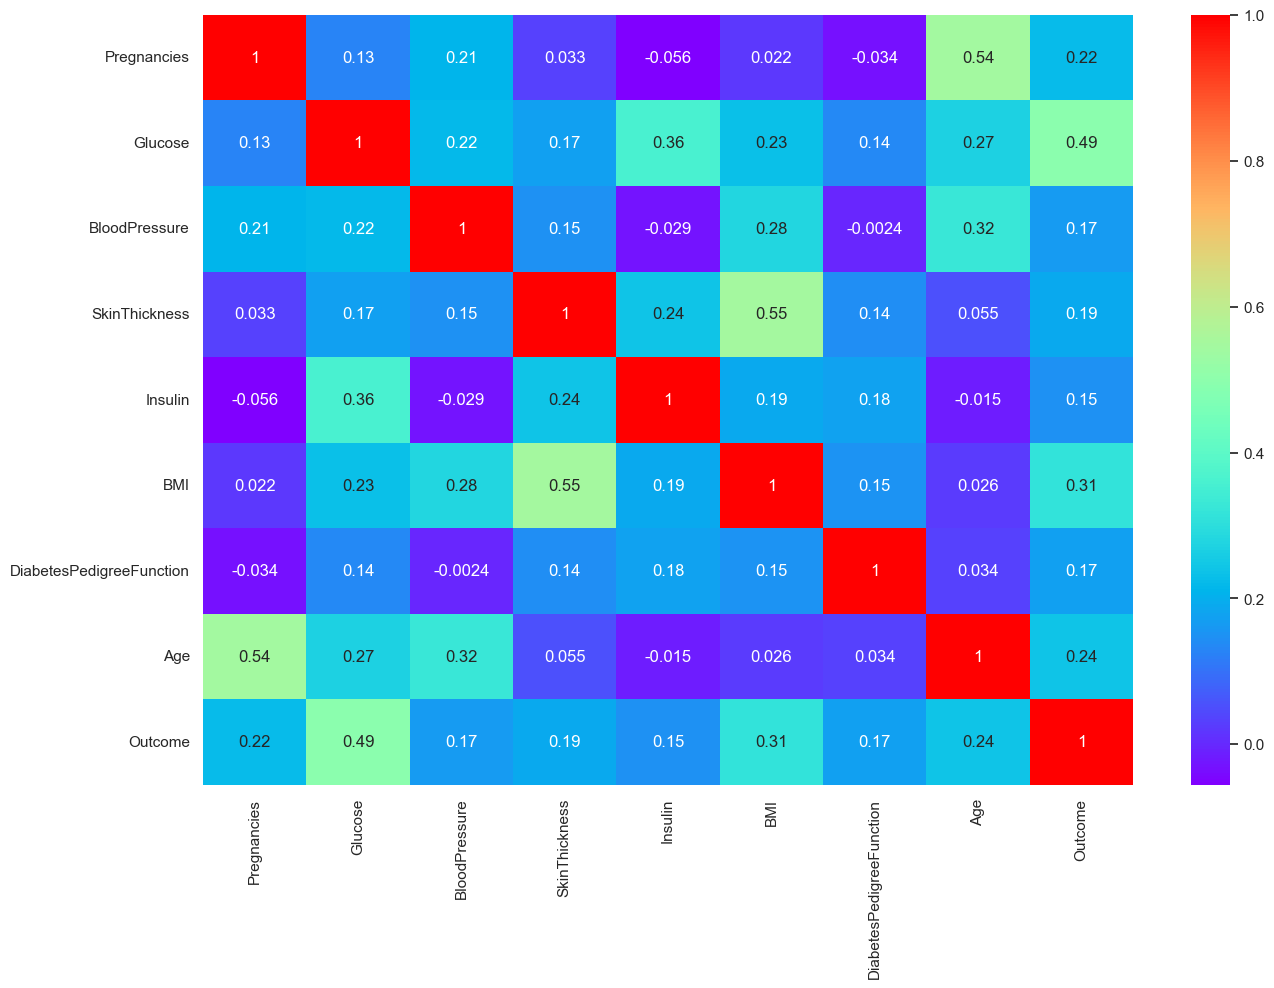

In [10]:
# Checking correlations between the features
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot = True, cmap = 'rainbow')

In [11]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [12]:
# Since it is a classification problem, we will use sigmoid to define dataset
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [13]:
sigmoid(-1)

0.2689414213699951

In [14]:
sigmoid(1)

0.7310585786300049

In [15]:
sigmoid(150)

1.0

In [16]:
# Checking that dataset is balance or not
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
dataset['Outcome'].value_counts()/len(dataset)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [18]:
# Split the data into dependent and independent variable
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [19]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
!pip install imblearn

In [22]:
# Balancing the Dataset
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam,y_sam = ros.fit_resample(x,y)

In [23]:
print("Orignal data :", y.value_counts())
print("After oversampling data :", y_sam.value_counts())

Orignal data : 0    500
1    268
Name: Outcome, dtype: int64
After oversampling data : 1    500
0    500
Name: Outcome, dtype: int64


In [24]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sam,y_sam,test_size = 0.2, random_state=10)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [27]:
# Predicting the model train and test data
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation metrics

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
print(confusion_matrix(y_train,y_pred_train))
print()
print(confusion_matrix(y_test,y_pred_test))

[[321  86]
 [106 287]]

[[71 22]
 [33 74]]


In [30]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       407
           1       0.77      0.73      0.75       393

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800


              precision    recall  f1-score   support

           0       0.68      0.76      0.72        93
           1       0.77      0.69      0.73       107

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.73       200



In [31]:
print("Training Accuracy Score", accuracy_score(y_train,y_pred_train))
print()
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.76

Test Accuracy Score 0.725


# K-Fold method

In [32]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
print(accuracy)

[0.775  0.7375 0.825  0.8125 0.7125 0.75   0.775  0.7    0.7375 0.7375]


In [34]:
print(accuracy.mean())

0.75625


In [35]:
print(accuracy.max())

0.825


# ROC-AUC Curve

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_test)
roc_auc

0.7275148226308913

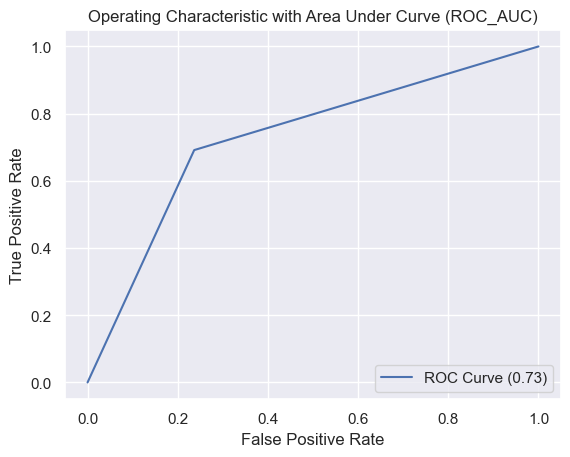

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr,label = "ROC Curve (%0.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Operating Characteristic with Area Under Curve (ROC_AUC)")
plt.legend(loc = 'lower right')